/home/szw001/.conda/envs/grib/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


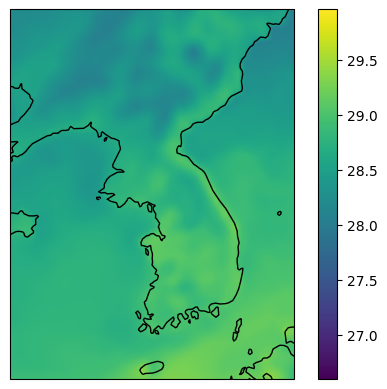

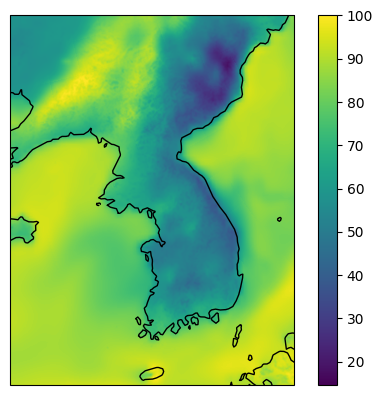

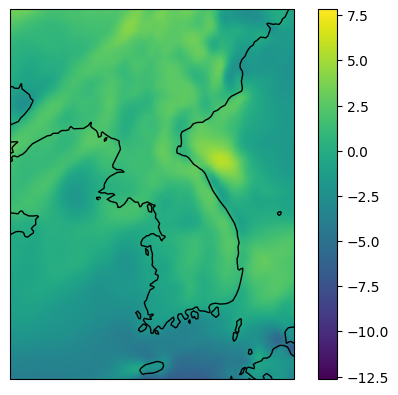

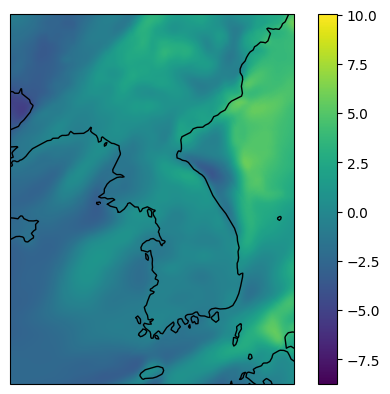

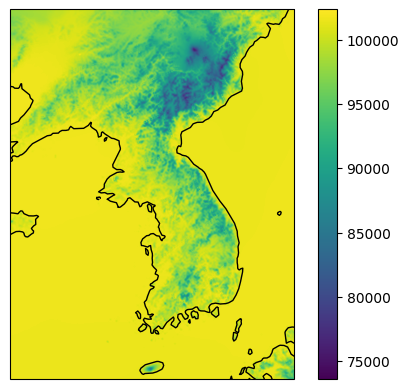

In [7]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy


path = '/home/szw001/development/2022/data_ana/data.rdps/r030_v040_ne36_unis_h000.2022051100.gb2'
grbs = pygrib.open(path)

features = ['2 metre temperature','2 metre relative humidity','10 metre U wind component','10 metre V wind component','Surface pressure']
grb1 = grbs.readline()
lat = grb1.latlons()[0]
lon = grb1.latlons()[1]
for i, feature in enumerate(features):
    temp = grbs.select(name=feature)[0]
    if i == 0:
        temperature = temp.values/10
    else:
        temperature = temp.values
        
    ax = plt.axes(projection=ccrs.LambertConformal(central_latitude = 37.56667, central_longitude = 127))
    cf = plt.pcolormesh(lon, lat, temperature,transform=ccrs.PlateCarree())
    plt.colorbar(cf, ax=ax)
    ax.set_extent([122,131.1,43,33])
    ax.coastlines('50m')
    plt.show()

